# gerd.Dispatch - simple dispatch with csv input

(Install gerd if not already installed with "pip install gerd" or upgrade to the newest version with "pip install gerd --upgrade".)

## Load gerd and pandas

In [33]:
from gerd import models
import pandas as pd

## Read csv input files

In [34]:
# Generators
input_gens = pd.read_csv('input_generators.csv', index_col='name')
# Storages
input_stos = pd.read_csv('input_pump_storages.csv', index_col='name')
# Load
input_load = pd.read_csv(
    'input_load_1d.csv', index_col='time', parse_dates=True)
# Variable costs
input_var_costs = pd.read_csv(
    'input_var_costs_1d.csv', index_col='time', parse_dates=True)

input_data = {'generators': input_gens,
              'storages': input_stos,
              'load': input_load,
              'var_costs': input_var_costs}

## Optimize as MIP first and then as a RMIP without pump storage

In [35]:
my_model = models.Dispatch(input_data, model_storages=False)
my_model.optimize('mip_rmip')

20-02-28 10:59:08 - gerd.models - INFO - Generator input data provided and checked
20-02-28 10:59:08 - gerd.models - INFO - No NTC input data provided
20-02-28 10:59:08 - gerd.models - INFO - 24 common timestamps found in the input
20-02-28 10:59:08 - gerd.models - INFO - Areas found in the input: ['de']
20-02-28 10:59:08 - gerd.model_solver - INFO - Build and optimize MIP
20-02-28 10:59:08 - gerd.model_solver - INFO - Solver started
20-02-28 10:59:08 - gerd.model_solver - INFO - Solver status: optimal
20-02-28 10:59:08 - gerd.model_solver - INFO - Time needed: 0.225 sec.
20-02-28 10:59:08 - gerd.model_solver - INFO - Build and optimize RMIP
20-02-28 10:59:08 - gerd.model_solver - INFO - Solver started
20-02-28 10:59:08 - gerd.model_solver - INFO - Solver status: optimal
20-02-28 10:59:08 - gerd.model_solver - INFO - Time needed: 0.122 sec.


### Look at the results

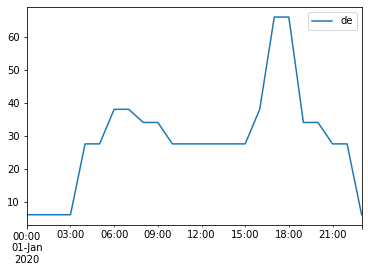

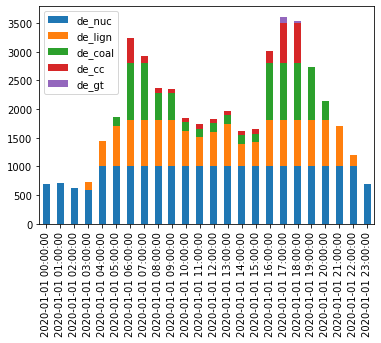

In [36]:
my_model.solution['prices'].plot()
my_model.solution['prod'].plot(kind='bar', stacked=True)

## Optimize with pump storage

In [37]:
my_model = models.Dispatch(input_data)
my_model.optimize('mip_rmip')

20-02-28 10:59:09 - gerd.models - INFO - Generator input data provided and checked
20-02-28 10:59:09 - gerd.models - INFO - Storage input data provided and checked
20-02-28 10:59:09 - gerd.models - INFO - No NTC input data provided
20-02-28 10:59:09 - gerd.models - INFO - 24 common timestamps found in the input
20-02-28 10:59:09 - gerd.models - INFO - Areas found in the input: ['de']
20-02-28 10:59:09 - gerd.model_solver - INFO - Build and optimize MIP
20-02-28 10:59:09 - gerd.model_solver - INFO - Solver started
20-02-28 10:59:09 - gerd.model_solver - INFO - Solver status: optimal
20-02-28 10:59:09 - gerd.model_solver - INFO - Time needed: 0.231 sec.
20-02-28 10:59:09 - gerd.model_solver - INFO - Build and optimize RMIP
20-02-28 10:59:09 - gerd.model_solver - INFO - Solver started
20-02-28 10:59:09 - gerd.model_solver - INFO - Solver status: optimal
20-02-28 10:59:09 - gerd.model_solver - INFO - Time needed: 0.115 sec.


### Look at the results

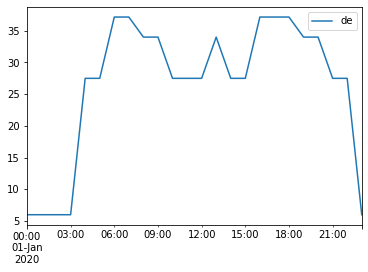

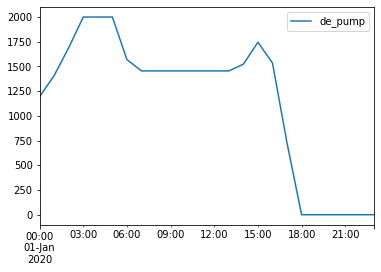

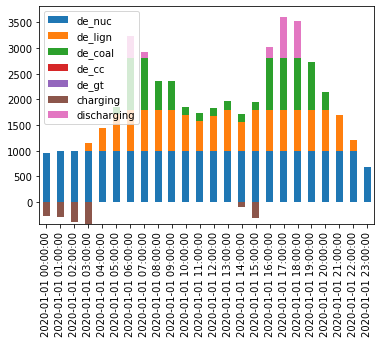

In [38]:
my_model.solution['prices'].plot()
my_model.solution['storage_cap'].plot()
# Charging and discharging
charging = - my_model.solution['charge'].rename(
    columns={'de_pump': 'charging'})
discharging = my_model.solution['discharge'].rename(
    columns={'de_pump': 'discharging'})
prod_incl_pump = my_model.solution['prod'].join(charging.join(discharging))
# Production including pump storage
prod_incl_pump.plot(kind='bar', stacked=True)